## Vectorization

is shortly speaking getting rid of explicit _for_ loop in the code. In the calculations, where we have a lot of data, it can be  extremely important to have the code running faster just by doing vectorization.

Below some benchmark is performed:

1. Dot product implemented in numpy
2. Traditional loop multiplication

In [19]:
# example for one run - numpy

import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = 0

tic = time.time()
c = np.dot(a,b)
toc = time.time()

print(c)
print("Vectorized version:" + str(1000*(toc-tic)) + " ms")

249753.70456274113
Vectorized version:0.965118408203125 ms


In [20]:
# example of one run - loop
c = 0
tic = time.time()
for i in range(1000000):
    c+=a[i]*b[i]
toc = time.time()

print(c)
print("Loop version:" + str(1000*(toc-tic)) + " ms")

249753.70456274686
Loop version:479.0365695953369 ms


In [31]:
# functions to perform a simulation because the timing can vary and we want to compare the distribution of a time

def numpy_dot_product(sim_number):
    results_list = []
    
    for i in range(sim_number):
        np.random.seed(i)
        a = np.random.rand(1000000)
        b = np.random.rand(1000000)
        c = 0

        tic = time.time()
        c = np.dot(a,b)
        toc = time.time()
        
        results_list.append(1000*(toc-tic))
    
    return results_list

In [ ]:
def loop_product(sim_number):
    results_list = []
    
    for i in range(sim_number):
        np.random.seed(i)
        a = np.random.rand(1000000)
        b = np.random.rand(1000000)
        c = 0

        tic = time.time()
        for j in range(1000000):
            c+=a[j]*b[j]
        toc = time.time()
        
        results_list.append(1000*(toc-tic))
    
    return results_list

In [32]:
numpy_list = numpy_dot_product(1000)

In [36]:
loop_list = loop_product(1000)

In [37]:
loop_list

[377.0008087158203,
 393.9967155456543,
 407.03463554382324,
 379.99415397644043,
 380.9618949890137,
 429.9957752227783,
 399.99866485595703,
 396.00181579589844,
 395.9977626800537,
 433.0005645751953,
 435.0008964538574,
 400.0372886657715,
 399.0035057067871,
 393.9981460571289,
 393.04661750793457,
 386.044979095459,
 385.99371910095215,
 382.0013999938965,
 385.0400447845459,
 386.9819641113281,
 418.0033206939697,
 378.9973258972168,
 403.0475616455078,
 415.94934463500977,
 403.9947986602783,
 398.99468421936035,
 393.00012588500977,
 384.0022087097168,
 391.0388946533203,
 377.95329093933105,
 387.00008392333984,
 420.04942893981934,
 390.99740982055664,
 407.99856185913086,
 397.9969024658203,
 371.99950218200684,
 371.9961643218994,
 370.99671363830566,
 388.04006576538086,
 378.9973258972168,
 376.0535717010498,
 397.02415466308594,
 388.99803161621094,
 378.0362606048584,
 383.042573928833,
 396.99482917785645,
 389.0492916107178,
 394.0002918243408,
 459.96618270874023,
 

In [40]:
import pandas as pd
results = pd.DataFrame({'numpy_dot': numpy_list
                        ,'loop': loop_list})

What can be seen is that after running 1000 simulations, the average time of numpy arrays mutliplication using _dot_ function is much smaller than using traditional loop element by element multiplication.

Text(0.5, 0, 'Time of vectors multiplication in ms')

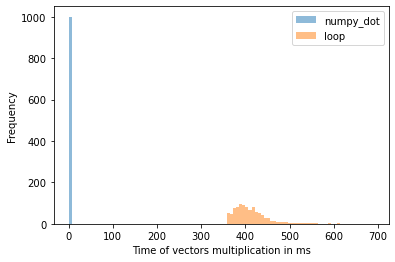

In [45]:
results.plot.hist(bins=100, alpha=0.5).set_xlabel("Time of vectors multiplication in ms")